# Assignment 6 - Targeted Marketing Campaign

## Nourhan El Zarif

## Read Data

### Import Data

In [1]:
import pandas as pd

file = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/Bank%20Data.csv'
data = pd.read_csv(file)

In [2]:
data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


This data is mostly strings. It will be converted to numerical values. Booleans will be converted to 0s and 1s, and categorical data will be one hot encoded. 

In [3]:
#map all columns with yes/no to 0 or 1
columns = ['married', 'car', 'save_act', 'current_act', 'mortgage', 'pep']

for col in columns:
    data[col] = data[col].map({'NO' : 0, 'YES': 1})

In [4]:
#map sex column with 0 or 1
data['sex'] = data['sex'].map({'MALE' : 0 , 'FEMALE' : 1})

In [5]:
#one hot encode the categorical data
import category_encoders

x = category_encoders.OneHotEncoder(handle_unknown = 'ignore', use_cat_names =True).fit_transform(data)

In [6]:
x.head()

,age,sex,region_INNER_CITY,region_TOWN,region_RURAL,region_SUBURBAN,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,1,0,0,0,17546.0,0,1,0,0,0,0,1
1,40,0,0,1,0,0,30085.1,1,3,1,0,1,1,0
2,51,1,1,0,0,0,16575.4,1,0,1,1,1,0,0
3,23,1,0,1,0,0,20375.4,1,3,0,0,1,0,0
4,57,1,0,0,1,0,50576.3,1,0,0,1,0,0,0


Now that the data is processed. The target will be seperated from features. 

In [7]:
#seperate target from data
y = x['pep']
x = x.drop(columns = 'pep')

In [8]:
x.shape

(600, 13)

In [9]:
y.value_counts()

0    326
1    274
Name: pep, dtype: int64

### Train/ Test Split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

# Exploratory Analysis

Text(0, 0.5, 'Count')

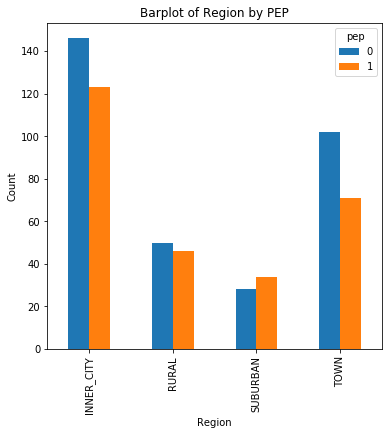

In [11]:
from matplotlib import pyplot as plt

%matplotlib inline
ax = plt.figure(figsize = (6,6)).gca()
data.groupby('region').pep.value_counts().unstack().plot.bar(ax = ax)
ax.set_title('Barplot of Region by PEP')
ax.set_xlabel('Region')
ax.set_ylabel('Count')

The barplot roughly shows that people from various regions have a roughly equal likelyhood of accepting or rejecting the targeted offer. This indictaes region is not a significant factor.

Text(0, 0.5, 'Income')

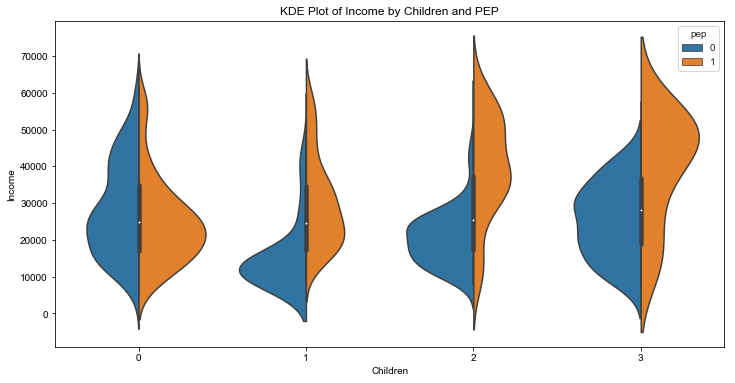

In [12]:
import seaborn as sns


ax = plt.figure(figsize = (12,6)).gca()
sns.set_style('whitegrid')
sns.violinplot(x = 'children', hue = 'pep', y = 'income', data = data, ax = ax, split = True)
ax.set_title('KDE Plot of Income by Children and PEP')
ax.set_xlabel('Children')
ax.set_ylabel('Income')

The KDE plot shows us a strong trend. People with no children are equally likely to accept or reject the marketing. Overall, people with low incomes tend to reject the marketing offer. As people's incomes increase, and have more children, they are more likely to accept the targeted marketing offer. 

Text(0, 0.5, 'Age')

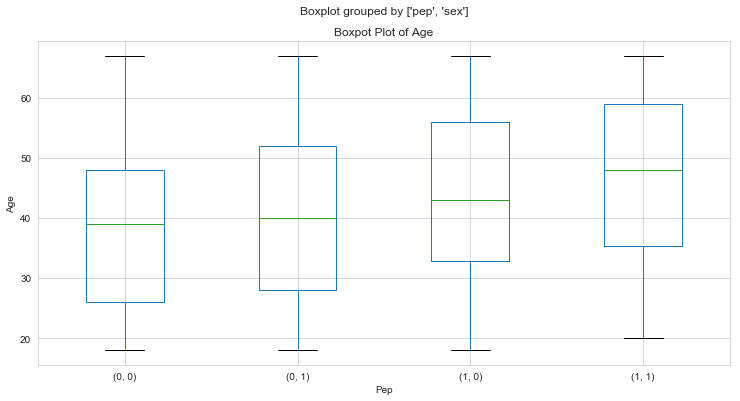

In [13]:
ax = plt.figure(figsize = (12,6)).gca()
data.loc[:, ['age', 'pep', 'sex']].boxplot(by = ['pep', 'sex'], ax = ax)
ax.set_title('Boxpot Plot of Age')
ax.set_xlabel('Pep')
ax.set_ylabel('Age')

People who reject the offer appear to be under the age of 40. People over the age 43 are more likely to accept. Females over the age of 47 are most likely to accept the marketing offer.

# Decision Tree vs Random Forest Performance

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5, random_state = 1)
clf_dt.fit(x_train, y_train)

print(clf_dt.feature_importances_)

[0.00644789 0.         0.         0.         0.         0.
 0.41379089 0.13240895 0.32328832 0.00815217 0.05364352 0.
 0.06226826]


In [15]:
dt_pred = clf_dt.predict(x_test)

In [16]:
#using libraries to collect model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Decision Tree accuracy is : {}%".format(accuracy_score(y_test, dt_pred)*100))
print("Decision Tree precision is : {}%".format(precision_score(y_test, dt_pred)*100))
print("Decision Tree recall is : {}%".format(recall_score(y_test, dt_pred)*100))

Decision Tree accuracy is : 88.33333333333333%
Decision Tree precision is : 96.29629629629629%
Decision Tree recall is : 81.25%


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 100, max_depth = 12, min_samples_leaf = 4, verbose = 0, random_state = 1)
clf_rf.fit(x_train, y_train)

print(clf_rf.feature_importances_)

[0.1428492  0.02369754 0.01755901 0.01412091 0.01008212 0.00775152
 0.26814616 0.08979372 0.27722571 0.01902787 0.05428082 0.01405973
 0.0614057 ]


In [18]:
rf_pred = clf_rf.predict(x_test)

In [19]:
print("Random Forest accuracy is : {}%".format(accuracy_score(y_test, rf_pred)*100))
print("Random Forest precision is : {}%".format(precision_score(y_test, rf_pred)*100))
print("Random Forest recall is : {}%".format(recall_score(y_test, rf_pred)*100))

Random Forest accuracy is : 90.0%
Random Forest precision is : 96.42857142857143%
Random Forest recall is : 84.375%


## Performance
The decision tree classifier has an accurecy of 88%, precision of 96%, and recall of 81%. The random forest classifier has an accurecy of 90%, precision of 96%, and recall of 84%. The random forst had an improved performace over the decision tree in all three metrics. The random forest classifier would be better in order to avoid spammin customers with products they do not desire.  

### Feature Importance 

In [20]:
feat_importance = pd.DataFrame()
feat_importance['feature'] = x.columns
feat_importance['DT Feat Import'] = clf_dt.feature_importances_
feat_importance['RF Feat Import'] = clf_rf.feature_importances_

Both classifiers have income and children as the most important features. This is the same trend we observed by visually exploring the data with KDE plots.

In [21]:
feat_importance

,feature,DT Feat Import,RF Feat Import
0,age,0.006448,0.142849
1,sex,0.000000,0.023698
2,region_INNER_CITY,0.000000,0.017559
3,region_TOWN,0.000000,0.014121
4,region_RURAL,0.000000,0.010082
5,region_SUBURBAN,0.000000,0.007752
6,income,0.413791,0.268146
7,married,0.132409,0.089794
8,children,0.323288,0.277226
9,car,0.008152,0.019028


## Decision Tree Structure

In [22]:
from sklearn import tree

dotfile = open('bank.dot', 'w')
tree.export_graphviz(clf_dt, out_file = dotfile, filled = True, rounded = True, feature_names = list(x))
dotfile.close()

from subprocess import check_call
check_call(['dot','-Tpng','bank.dot','-o','bank.png'])

0

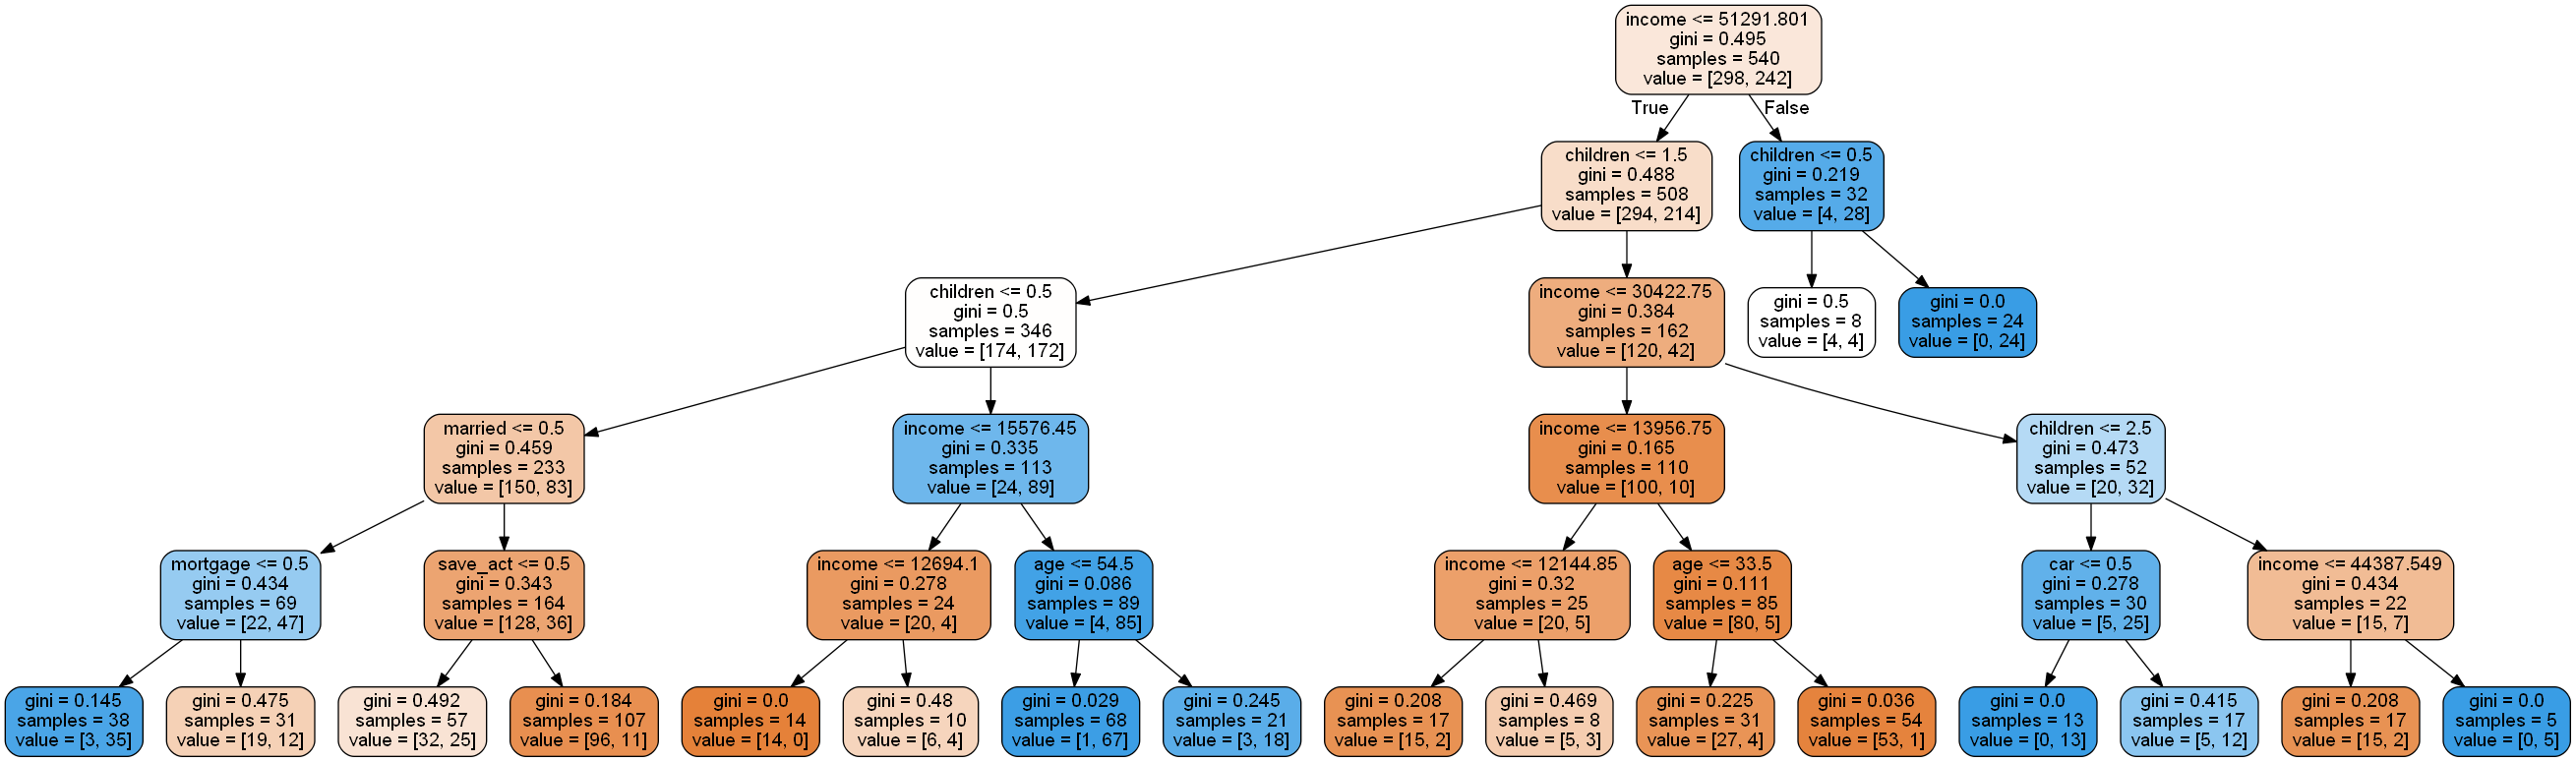

In [23]:
from IPython.display import Image
Image(filename = 'bank.png', width = 1000, height = 1000)

## Random Forest Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, rf_pred),
    columns = ['Predicted No', 'Predicted Yes'],
    index = ['True No', 'True Yes']
)

,Predicted No,Predicted Yes
True No,27,1
True Yes,5,27
